Output()

FileUpload(value=(), accept='.jpg,.jpeg,.png', description='Upload')

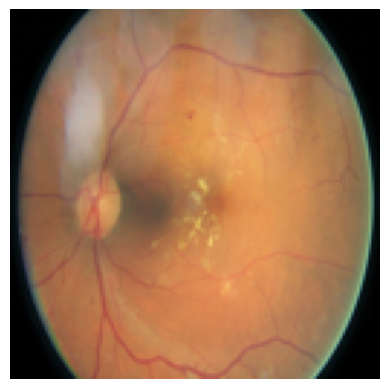

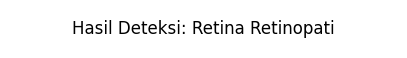

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import clear_output
from tensorflow.keras.models import load_model


output = widgets.Output()
display(output) 
train = load_model(r"D:\Data Sains dan Analitis\Pertemuan 16 Project Akhir\Deteksi_retina\retina_v2.h5")

def load_and_preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((128, 128)) 
    img = np.array(img) / 255.0
    return img

def predict_image(image_path, model):
    img = load_and_preprocess_image(image_path)
    img = np.expand_dims(img, axis=0)
    result = model.predict(img)
    print(f'Probabilitas Retinopati: {result[0][0]}')  # <-- ini muncul di bawah cell
    return 'Retina Retinopati' if result[0][0] > 0.5 else 'Retina Normal'


def on_file_upload(change):
    if change['new']:
        for uploaded_file in change['new']:
            with open(uploaded_file['name'], 'wb') as f:
                f.write(uploaded_file['content'])
                
            with output:
                clear_output()  
                print("Memproses gambar, harap tunggu...") 
            

            img_path = uploaded_file['name']  
            img = load_and_preprocess_image(img_path)
            prediction = predict_image(img_path, train)
            # Tampilkan gambar
            print(f'Hasil Deteksi untuk gambar {uploaded_file["name"]}:')
            plt.imshow(img)
            plt.axis('off')
            fig, ax = plt.subplots(figsize=(5, 0.5))  # Ukuran figure untuk teks
            ax.text(0.5, 0.5, f'Hasil Deteksi: {prediction}', ha='center', va='center', fontsize=12)
            ax.axis('off')  
            plt.show() #Hasil
            
# File Upload
upload_widget = widgets.FileUpload(accept='.jpg,.jpeg,.png', multiple=False)
upload_widget.observe(on_file_upload, names='value')
display(upload_widget)
